# Statistics II

**Hans Dembinski, TU Dortmund**

* Uncertainties of estimators
* Bootstrapping of uncertainties
* Error propagation
* Estimation of systematic uncertainties
* Resources for further learning

![image.png](https://imgs.xkcd.com/comics/error_bars.png)

## What is an uncertainty, really?

* Example: $a = 3 \pm 0.5$, where 0.5 is the *standard error* (jargon: "error" = uncertainty).

* What does this mean?
* What we would like it to mean: "The true value is with a probability of 68 % between 2.5 and 3.5".
* What it technically means (in most cases): "The interval 2.5 to 3.5, **if always constructed according to this analysis procedure**, contains the true value in 68 % of **identically repeated random experiments**."
* Both interpretations coincide only in the asymptotic limit of infinitely large samples.

## Statistical and systematic uncertainties

* Either type can be correlated or uncorrelated


### Statistical uncertainty
* Origin: We use finite sample instead of infinite distribution
* Goes down as simple size increases
* Example
    * Arithmetic mean $\bar x = \frac 1N\sum_i x_i$
    * Variance of mean $ = \frac 1 {N(N - 1)}\sum_i (x_i - \bar x)^2$
* We have reliable standard recipes to calculate these

#### Variance or standard deviation?
* Standard deviation $\sigma = \sqrt{V}$
* We communicate standard deviations, but compute variances
* Variance is more fundamental
    * Second central moment of distribution
    * $V = V_1 + V_2$, but $\sigma = \sqrt{\sigma_1^2 + \sigma_2^2}$

### Systematic uncertainty
* Origin: Imperfect appartus or technique, deviations of reality from simplified models
* Quantifies potential mistakes in analysis
* Does not go down as sample size increases
* Often correlated
    * Real-life: Measured the length of ten shoes with ruler than has factory tolerance of 0.1 mm
    * LHCb: Measured cross-sections with value of luminosity that has uncertainty of 1-2%
* Not well covered in statistics books, but some theoretical results available

## Estimators

* **Estimator** maps dataset to value $\{x_i \} \to \hat p$
    * Notation: $\hat p$ is **estimate** of true value $p$
    * Estimator can have functional form or be an algorithm
    * Arithmetic mean $\hat \mu = \frac 1N \sum_i x_i$
    * Sample median: Sort $x_i$, pick value in the middle
* Many kinds of estimators, some better than others
* We want **optimal** estimators
    * As close to true value as possible
    * Easy to compute and/or easy to apply to any problem
    * Robustness against outliers
* In HEP, we mainly use
    * Plug-in estimator
    * Maximum-likelihood estimator (MLE)


## Bias and variance

* In one experiment, we obtain sample $\{ x_i \}$ with size $N$ and compute estimate $\hat a$
* Sample $\{ x_i \}$ is random, estimate $\hat a$ also random
* If experiment is identically repeated $K$ times, we get sample $\{ x_i \}_k$ and estimate $\hat a_k$ each time
* Quantify properties of sample of estimates $\{ \hat a_1, \hat a_2, \dots, \hat a_K \}$ to describe accuracy of estimator with bias and variance estimates
    * Bias of $\hat a$ estimated as $\frac1K \sum_i (\hat a_i - a)$
    * Variance of $\hat a$ estimated as $\frac1K\sum_i (\hat a_i - a)^2$
* Example for a biased estimator: if true mean $\mu$ is unknown, sample variance $\hat V = \frac1N\sum_i (x_i - \hat\mu)^2$ is biased

In [14]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm

# true values and distribution
mu, sigma = 1, 1
dist = norm(mu, sigma)

N = 10
K = 10000
var_1, var_2 = [], []
for k in range(K):
    sample = dist.rvs(size=N, random_state=k+1)
    hat_mu = np.mean(sample)
    v1 = np.mean((sample - np.mean(sample)) ** 2)
    v2 = np.mean((sample - mu) ** 2)
    var_1.append(v1)
    var_2.append(v2)

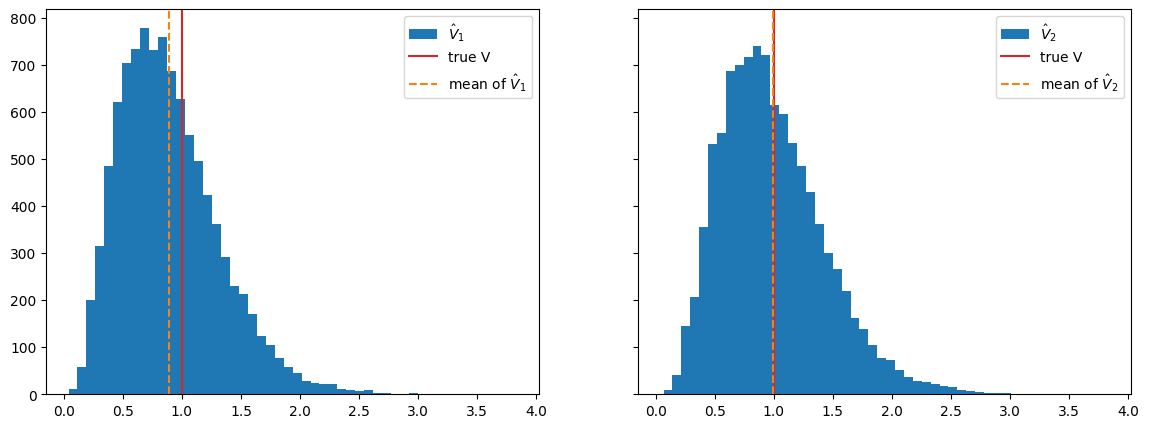

In [15]:
mu, sigma = dist.stats()
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5))
ax[0].hist(var_1, bins=50, label="$\hat V_1$");
ax[1].hist(var_2, bins=50, label="$\hat V_2$");
for axi in ax:
    axi.axvline(sigma ** 2, color="C3", label="true V")
ax[0].axvline(np.mean(var_1), color="C1", ls="--", label="mean of $\hat V_1$")
ax[1].axvline(np.mean(var_2), color="C1", ls="--", label="mean of $\hat V_2$")
for axi in ax:
    axi.legend()

* Well-known bias correction for this case: $\frac N{N-1}\hat V_1$ is unbiased (for derivation see e.g. F. James book (references at end))

**Exercise**

* Compute bias-corrected estimate of $\hat V_1$ and compare mean with true value `sigma ** 2`

In [16]:
# do exercise here

In [17]:
# solution

var_1_corr = np.multiply(var_1, N / (N - 1))
f"<hat V_1> = {np.mean(var_1):.2f} <hat V_1(corrected)> = {np.mean(var_1_corr):.2f} truth = {sigma**2:.2f}"

'<hat V_1> = 0.89 <hat V_1(corrected)> = 0.99 truth = 1.00'

### Plug-in estimator

* Plug-in principle: replace true values in some formula with estimates, e.g.

$$
c = g(a, b, \dots) \to \hat c = g(\hat a, \hat b, \dots)
$$

* Justification
    * For $N\to \infty$, $\Delta a = \hat a - a \to 0$ for any reasonable estimator
    * $g(\hat a) = g(a + \Delta a) = g(a) + O(\Delta a) \to g(a)$ for smooth $g$

* Example: $\sqrt{N}$ uncertainty estimator for Poisson-distributed count $N$
    * $P(N; \lambda) = e^{-\lambda} \lambda^N / N!$
    * Variance of counts: $V_N = \lambda$
    * Estimator $\hat \lambda = \frac 1 K \sum_k N_k$; for $K = 1$, $\hat \lambda = N$
    * Plug-in principle: $\hat V_N = \hat \lambda = N$
    * Standard deviation: $\hat \sigma_N = \sqrt{\hat V_N} = \sqrt{N}$

* Plug-in estimators can behave poorly in small samples
* Poisson example: $\lambda = 0.01$, sample $N = 0 \to \hat \sigma_N = 0$


## Bootstrapping to get bias and variance of estimators

* Bootstrap method: generic way to compute bias and variance of any estimator

### Parametric bootstrap

* Available:
    * Sample $\{ x_i \}$ distributed along $f(x; a)$, $a$ is unknown
    * Estimator for $\hat a$
* Want to know bias and variance of estimator
* Simulate experiment $K$
    * Draw samples $\{ x_i \}_k$ of equal size from $\hat f(x; \hat a)$ (plugin-estimate)
    * Compute $\hat a_k$
    * Bias $\frac 1 K \sum_k (\hat a_k - \hat a)$
    * Variance $\frac 1 K \sum_k (\hat a_k - \hat a)^2$

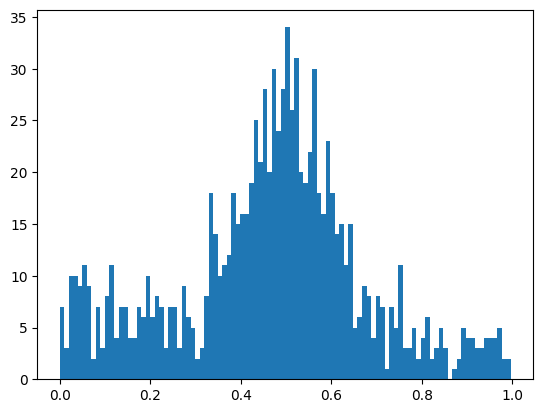

In [18]:
def make_data(size, seed=1):
    rng = np.random.default_rng(seed)
    s = rng.normal(0.5, 0.1, size=size // 2)
    b = rng.exponential(1, size=2 * size)
    b = b[b < 1]
    b = b[: size // 2]
    x = np.append(s, b)
    return x

x = make_data(1000)

w, xe, *_ = plt.hist(x, bins=100);

In [19]:
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL
from numba_stats import norm, truncexpon

def model(x, s, mu, sigma, b, slope):
    return s * norm.cdf(x, mu, sigma) + b * truncexpon.cdf(x, 0, 1, 0, slope)

nll = ExtendedBinnedNLL(w, xe, model)
m = Minuit(nll, s=100, b=100, mu=0.5, sigma=0.1, slope=1)
m.limits["mu"] = (0, 1)
m.limits["s", "b", "sigma", "slope"] = (0, None)

In [20]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 102.6 (χ²/ndof = 1.1)      │              Nfcn = 172              │
│ EDM = 2.32e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s     │    508    │    32     │            │            │    0    │         │       │
│ 1 │ mu    │   0.504   │   0.006   │            │            │    0    │    1    │       │
│ 2 │ sigma │   0.089   │   0.005   │            │            │    0    │         │       │
│ 3 │ b     │    494    │    32     │            │            │    0    │         │       │
│ 4 │ slope │   1.14    │   0.23    │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────────────────────────────────┐
│       │          s         mu      sigma          b      slope │
├───────┼────────────────────────────────────────────────────────┤
│     s │   1.01e+03   1.993e-3  72.895e-3     -0.5e3      -1.31 │
│    mu │   1.993e-3   3.06e-05   0.001e-3  -2.106e-3  -0.256e-3 │
│ sigma │  72.895e-3   0.001e-3   2.84e-05 -73.155e-3  -0.202e-3 │
│     b │     -0.5e3  -2.106e-3 -73.155e-3        997       1.33 │
│ slope │      -1.31  -0.256e-3  -0.202e-3       1.33     0.0507 │
└───────┴────────────────────────────────────────────────────────┘

* Fit can be written as estimator

In [21]:
def estimator(x):
    w = np.histogram(x, bins=xe)[0]
    nll = ExtendedBinnedNLL(w, xe, model)
    m = Minuit(nll, s=100, b=100, mu=0.5, sigma=0.1, slope=1)
    m.limits["mu"] = (0, 1)
    m.limits["s", "b", "sigma", "slope"] = (0, None)
    m.strategy = 0  # faster, if we don't care about errors
    m.migrad()
    return m.values

In [22]:
s, mu, sigma, b, slope = m.values

replicates = []
for seed in range(100):
    rng = np.random.default_rng(seed)
    s_k = rng.poisson(s)
    b_k = rng.poisson(b)
    x_k = np.append(
        norm.rvs(mu, sigma, size=s_k, random_state=seed),
        truncexpon.rvs(0, 1, 0, slope, size=b_k, random_state=seed),
    )

    replicates.append(estimator(x_k))

replicates = np.transpose(replicates)

**Exercise**

* Compute bias and standard deviation of replicates for each parameter
* Compare standard deviation of replicates with Minuit's uncertainty estimate, accessible via `m.errors`

In [23]:
# do exercise here

In [24]:
# solution

for i, name in enumerate(m.parameters):
    p = m.values[i]
    r = replicates[i]
    bias = np.mean(r - p)
    std = np.mean((r - p)**2) ** 0.5
    print(f"{name:8} 𝜎(Minuit) = {m.errors[i]:6.2g} 𝜎(bootstrap) = {std:6.2g} "
          f"bias/𝜎 = {bias / std:5.2f} ")

s        𝜎(Minuit) =     32 𝜎(bootstrap) =     29 bias/𝜎 =  0.02 
mu       𝜎(Minuit) = 0.0055 𝜎(bootstrap) = 0.0059 bias/𝜎 = -0.24 
sigma    𝜎(Minuit) = 0.0053 𝜎(bootstrap) = 0.0036 bias/𝜎 = -0.09 
b        𝜎(Minuit) =     32 𝜎(bootstrap) =     30 bias/𝜎 = -0.07 
slope    𝜎(Minuit) =   0.22 𝜎(bootstrap) =   0.22 bias/𝜎 =  0.00 


## Nonparametric bootstrap

* Can do the same by sampling directly from $\{ x_i \}$
* Standard method for samples of fixed size $N$:
  * Pick $N$ random samples from $\{ x_i \}$ with replacement to obtain $\{ x_i \}_k$
  * Compute $\hat a_k$ from $\{ x_i \}_k$ and proceed as before
* "Extended method" for samples of variable size (Poisson):
  * Randomly draw $M$ from Poisson distribution with $\lambda = N$
  * Pick $M$ random samples from $\{ x_i \}$ with replacement to obtain $\{ x_i \}_k$
  * ...
* Convenient: use same algorithms for any distribution
* Efficient implementations for both algorithms in `resample`

![](https://resample.readthedocs.io/en/stable/_images/logo.svg)

In [25]:
import resample

resample.__version__

'1.6.0'

In [26]:
from resample.bootstrap import resample

# generate replicated samples of varying size (Poisson distributed)
for x_k in resample(x, size=100, method="extended", random_state=1):
    print(x_k)
    break

[0.53455842 0.53455842 0.58216181 ... 0.5502289  0.5502289  0.65587954]


**Exercise**

* Again compute replicated fit results using `resampe` and store results in a list
* Copy previous code where possible
* Again compute bias and standard deviation of replicates and compare with Minuit's uncertainty estimate

In [27]:
# do exercise here

In [28]:
# solution

replicates = []
for x_k in resample(x, size=100, method="extended", random_state=1):
    replicates.append(estimator(x_k))

replicates = np.transpose(replicates)

for i, name in enumerate(m.parameters):
    p = m.values[i]
    r = replicates[i]
    bias = np.mean(r - p)
    std = np.mean((r - p)**2) ** 0.5
    print(f"{name:8} 𝜎(Minuit) = {m.errors[i]:6.2g} 𝜎(bootstrap) = {std:6.2g}"
          f" bias/𝜎 = {bias / std:5.2f}")

s        𝜎(Minuit) =     32 𝜎(bootstrap) =     30 bias/𝜎 = -0.15
mu       𝜎(Minuit) = 0.0055 𝜎(bootstrap) = 0.0058 bias/𝜎 = -0.12
sigma    𝜎(Minuit) = 0.0053 𝜎(bootstrap) = 0.0056 bias/𝜎 = -0.06
b        𝜎(Minuit) =     32 𝜎(bootstrap) =     34 bias/𝜎 =  0.04
slope    𝜎(Minuit) =   0.22 𝜎(bootstrap) =   0.28 bias/𝜎 =  0.21


* `resample` provides shortcut for computing variance

In [36]:
from resample.bootstrap import variance

var = variance(estimator, x, method="extended", size=100, random_state=1)

for i, name in enumerate(m.parameters):
    std = var[i] ** 0.5
    print(f"{name:8} 𝜎(Minuit) = {m.errors[i]:6.2g} 𝜎(bootstrap) = {std:6.2g}")

s        𝜎(Minuit) =     32 𝜎(bootstrap) =     30
mu       𝜎(Minuit) = 0.0055 𝜎(bootstrap) = 0.0058
sigma    𝜎(Minuit) = 0.0053 𝜎(bootstrap) = 0.0056
b        𝜎(Minuit) =     32 𝜎(bootstrap) =     34
slope    𝜎(Minuit) =   0.22 𝜎(bootstrap) =   0.27


**Exercise**

* Repeat the variance calculation without using `method="extended"`
* Compare the uncertainties of $s$ and $b$

In [39]:
# solution

var2 = variance(estimator, x, size=100, random_state=1)

for i, name in enumerate(m.parameters):
    std = var[i] ** 0.5
    std2 = var2[i] ** 0.5
    print(f"{name:8} 𝜎(extended bootstrap) = {std:6.2g} "
          f"𝜎(normal bootstrap) = {std2:6.2g}")

s        𝜎(extended bootstrap) =     30 𝜎(normal bootstrap) =     27
mu       𝜎(extended bootstrap) = 0.0058 𝜎(normal bootstrap) = 0.0056
sigma    𝜎(extended bootstrap) = 0.0056 𝜎(normal bootstrap) =  0.006
b        𝜎(extended bootstrap) =     34 𝜎(normal bootstrap) =     29
slope    𝜎(extended bootstrap) =   0.27 𝜎(normal bootstrap) =   0.24


* Bootstrap can be applied to most statistical problems in HEP
* Restriction: samples must be identically and independently distributed
* May work well even with small samples (< 10)

## Error propagation

* Full analysis typically combines many intermediate results with uncertainties into final result
* Consider $\vec b = g(\vec a)$ with uncertainties in $\vec a$
* Two ways of computing uncertainties of $\vec b$
  * Monte-Carlo simulation
  * Error propagation

### Monte-Carlo simulation

* Draw variations of fit result from multivariate normal distribution
* Compute variable of interest from variations
* Compute standard deviation or covariance of 

* Example: compute uncertainty of $\hat N = \hat s + \hat b$

In [46]:
rng = np.random.default_rng(1)
a_k = rng.multivariate_normal(m.values, m.covariance, size=1000)

def g(a):
    return a[0] + a[3]

b_k = np.apply_along_axis(g, -1, a_k)

f"𝜎(N, simulation) = {np.std(b_k):.3g} 𝜎(N, expected) = {np.sqrt(len(x)):.3g}"

'𝜎(N, simulation) = 30.8 𝜎(N, expected) = 31.6'

* Note $\sigma_N \approx \sigma_s \approx \sigma_b$, because $s_k$ and $b_k$ are anti-correlated 

### Error propagation
* Given: $\vec a$ with covariance matrix $C_a$ and differentiable function $\vec b = g(\vec a)$
* $\vec b$ can have different dimensionality from $\vec a$
* One can derive via first-order Taylor expansion:
  $$
  C_b = J \, C_a \, J^T \text{ with } J_{ik} = \frac{\partial g_i}{\partial a_k}
  $$
* Can be used for statistical and systematic uncertainties

* Useful special cases
    * Sum of scaled independent random values $c = \alpha a + \beta b$ ($\alpha, \beta$ are constant)
    $$
    \sigma^2_c = \alpha^2 \sigma^2_a + \beta^2 \sigma^2_b
    $$
    * Product of powers of independent random values $c = a^\alpha \, b^\beta$
    $$
    \left(\frac{\sigma_c}{c}\right)^2 = \alpha^2 \left(\frac{\sigma_a}{a}\right)^2 + \beta^2 \left(\frac{\sigma_b}{b}\right)^2
    $$
* Final uncertainty often dominated by one term
* When estimating systematic uncertainties: put your effort in estimating **largest term** and be lax on others

* Computation of $J$ by hand error-prone and tedious, use `jacobi` library which uses numerical derivative

![](https://camo.githubusercontent.com/27771f02972dd2b6acd8219907d15eb6a4e349e9086191b2ea33e2fd534b42b7/68747470733a2f2f6864656d62696e736b692e6769746875622e696f2f6a61636f62692f5f696d616765732f6c6f676f2e737667)

In [42]:
import jacobi

jacobi.__version__

'0.9.2'

In [45]:
b, cov_b = jacobi.propagate(g, m.values, m.covariance)

f"𝜎(N, error propagation) = {cov_b ** 0.5:.3g} 𝜎(N, expected) = {np.sqrt(len(x)):.3g}"

'𝜎(N, error propagation) = 31.7 𝜎(N, expected) = 31.6'

## Systematic uncertainties: Known unknowns

"There are known knowns, things we know that we know;<br>
and there are known unknowns, things that we know we don't know.<br>
But there are also unknown unknowns, things we do not know we don't know."<br>
*Donald Rumsfeld*

* Why data analyses take so long: study data, detector, and methods to turn **unknown unknowns** into **known knowns** or **known unknowns**
* **known unknowns** = systematic uncertainties

* No formal way, but generally...
  * Worry
      * What could go wrong?
      * What are my assumptions?
      * Example: You take an efficiency or correction factor from simulation, but simulation differs from real experiment. Solution: Perform control measurement to estimate how much simulation differs from real experiment.
  * Methods
      * Use methods that are known to be optimal for your problem or derive them from first principles
      * General purpose methods often safer to use than special-case methods
      * Maximum-likelihood fit > least-squares fit
      * Bootstrap estimate of uncertainty > other uncertainty estimates
  * Apply **checks**
      * Validate whole analysis on simulated data (sometimes you can use toy simulation)
      * Split data by magnet polarity, fill, etc., analyze splits separately, check for agreement

* Guidelines for handling systematic errors
   * [Roger Barlow: Systematic Errors: Facts and Fictions (2002)](https://arxiv.org/pdf/hep-ex/0207026.pdf)
   * [Roger Barlow, "Practical Statistics for Particle Physics" (2019), Section 6.5 ](https://arxiv.org/pdf/1905.12362.pdf)


## LHCb Statistics Guidelines

* [Living document on GitLab](https://gitlab.cern.ch/lhcb/statistics-guidelines/-/blob/master/main.md) to collect information about best practices
    * Everyone can edit this and propose new items!
    * LHCb StatML conveners are editors, liaisons check new content

* Index instead of a book
    * Brief items with advice
    * Links to literature

* In conversation, you can directly link to items, point to title and copy link (right-click menu)

## Introductory statistics books

* [List of books on TWiki pages of Statistis and Machine Learning WG](https://twiki.cern.ch/twiki/bin/viewauth/LHCbPhysics/LHCbStatistics)

* Books I personally learned from
    * Glen Cowan, "Statistical Data Analysis", Oxford University Press, 1998
    * F. James, "Statistical Methods in Experimental Physics", 2nd edition, World Scientific, 2006
    * B. Efron, R.J. Tibshirani, "An Introduction to the Bootstrap", CRC Press, 1994

## Introductory statistics books

* [List of books on TWiki pages of Statistis and Machine Learning WG](https://twiki.cern.ch/twiki/bin/viewauth/LHCbPhysics/LHCbStatistics)

* Books I personally learned from
    * Glen Cowan, "Statistical Data Analysis", Oxford University Press, 1998
    * F. James, "Statistical Methods in Experimental Physics", 2nd edition, World Scientific, 2006
    * B. Efron, R.J. Tibshirani, "An Introduction to the Bootstrap", CRC Press, 1994

* Roger Barlow
    * [Introductory lecture (2019)](http://barlow.web.cern.ch/barlow/talks/2019/10.pdf)
    * [Systematic Errors: Facts and Fictions (2002)](https://arxiv.org/pdf/hep-ex/0207026.pdf)
    * ["Practical Statistics for Particle Physics" (2019), Section 6.5 ](https://arxiv.org/pdf/1905.12362.pdf)

* More Jupyter notebooks
    * [Matt Kenzie, PDG averaging](https://github.com/matthewkenzie/notebooks/blob/master/pdg_averaging.ipynb)
    * [Matt Kenzie, MLE uncertainties](https://github.com/matthewkenzie/notebooks/blob/master/LikelihoodProb.ipynb)
    * [iminuit tutorials on various fitting topics](https://iminuit.readthedocs.io/en/stable/tutorials.html)

* Free books
    * ["Introduction to Statistics and Data Analysis for Physicists", Gerhard Bohm and Günter Zech, Verlag-DESY, 2010](http://www-library.desy.de/preparch/books/vstatmp_engl.pdf)
    * ["Statistische und numerische Methoden der Datenanalyse", V Blobel and E Lohrmann, Open Access ebook CC-BY 3.0, 2012](https://link.springer.com/content/pdf/10.1007%2F978-3-663-05690-4.pdf)